<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Decision Trees & Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Tree models

Let's start with a simple example to understand how the depth of the tree impacts overfitting/underfitting.  We will generate some synthetic data which has two features and belongs to 4 classes.  We will then illustrate how to classify the datapoints using a tree model.

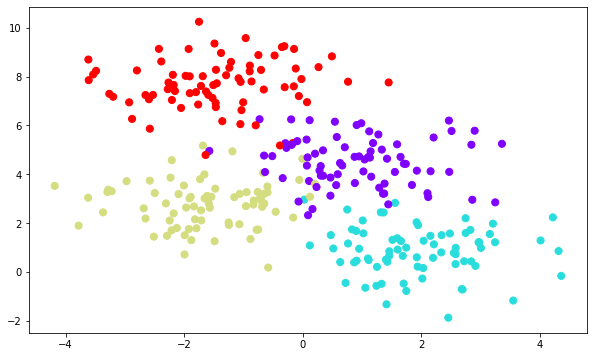

In [2]:
# Generate some synthetic data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [3]:
# Function to visualize the decision boundaries created by a classification model
def plot_decision_boundaries(X,y,model):
    
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    markers = ['^','s','v','o','x']
    colors = ['yellow','green','purple','blue','orange']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for i,k in enumerate(np.unique(y)):
        plt.scatter(X.loc[y==k].iloc[:,0],X.loc[y==k].iloc[:,1],
                    c=colors[i],marker=markers[i],label=k,edgecolor='black')

    xgrid = np.arange(X.iloc[:,0].min(),X.iloc[:,0].max(),
                      (X.iloc[:,0].max()-X.iloc[:,0].min())/500)
    ygrid = np.arange(X.iloc[:,1].min(),X.iloc[:,1].max(),
                      (X.iloc[:,1].max()-X.iloc[:,1].min())/500)
    xx,yy = np.meshgrid(xgrid,ygrid)
    
    mesh_preds = model.predict(np.c_[xx.ravel(),yy.ravel()])
    mesh_preds = mesh_preds.reshape(xx.shape)
    plt.contourf(xx,yy,mesh_preds,alpha=0.2,cmap=cmap)
    plt.legend()
    return

We will now build a decision tree model to classify the data.  We will set `max_depth=None`, meaning that our tree can grow as deep as it would like in order to correctly classify the training data.

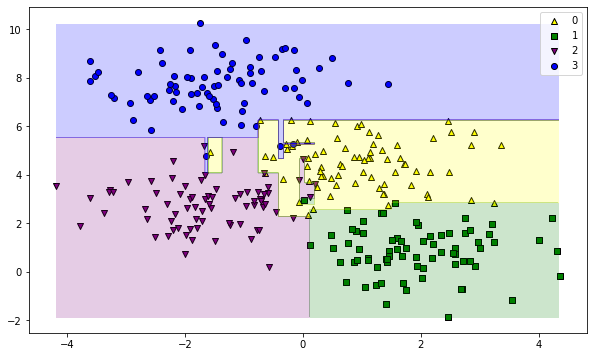

In [4]:
# Instantiate the decision tree model using Scikit-Learn's DecisionTreeClassifier()
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

As we can see above, our model appears to be overfitting the data - for example, take a look at the small yellow rectangle between the red and blue areas, or the small red area in the midst of the yellow.  It's doubtful that our actual decision boundary between classes looks like this - what is likely happening here is that our tree model is overfitting to single points. Let's run again using a fixed value of 2 for max_depth and look at the resulting decision boundaries

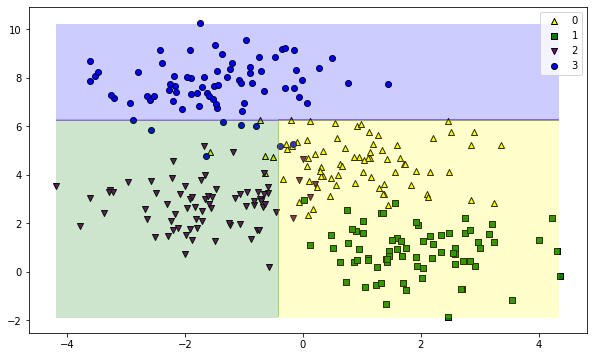

In [6]:
# Instantiate the decision tree model using max_depth=2
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

Here we can see that this model is also not ideal.  Because we have constrained the tree depth to 2 layers, our model is too simple and is only able to classify the data into 3 classes rather than the 4 we actually have.  Let's try one more time, setting our depth to 3 layers.

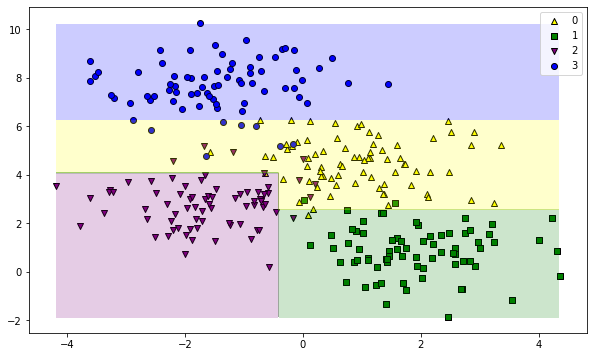

In [7]:
# Instantiate the decision tree model using max_depth=3
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X, y)

# Plot the decision boundaries of the tree model
plt.figure(figsize=(10,6))
plot_decision_boundaries(X,y,tree_model)

This looks better! We can see that as we change max_depth, we get a simpler or more complex model.  We can tune this as we do with any hyperparameter and find the optimal depth of our tree using a validation set or cross-validation to ensure we are not overfitting our tree to the training data, which is a common risk when working with single decision trees.

### Visualizing a decision tree
Let's do another example using a decision tree model, and this time we are going to use Scikit-Learn's functionality to visualize the decision tree that gets created.  For this example we will again be working with the 'iris' dataset.

In [27]:
# Load the dataset using a helper function in Seaborn
iris = sns.load_dataset('iris')

# Create feature matrix
X = iris.drop(labels='species',axis=1)

# Create target vector
y = iris['species']

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.25)

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

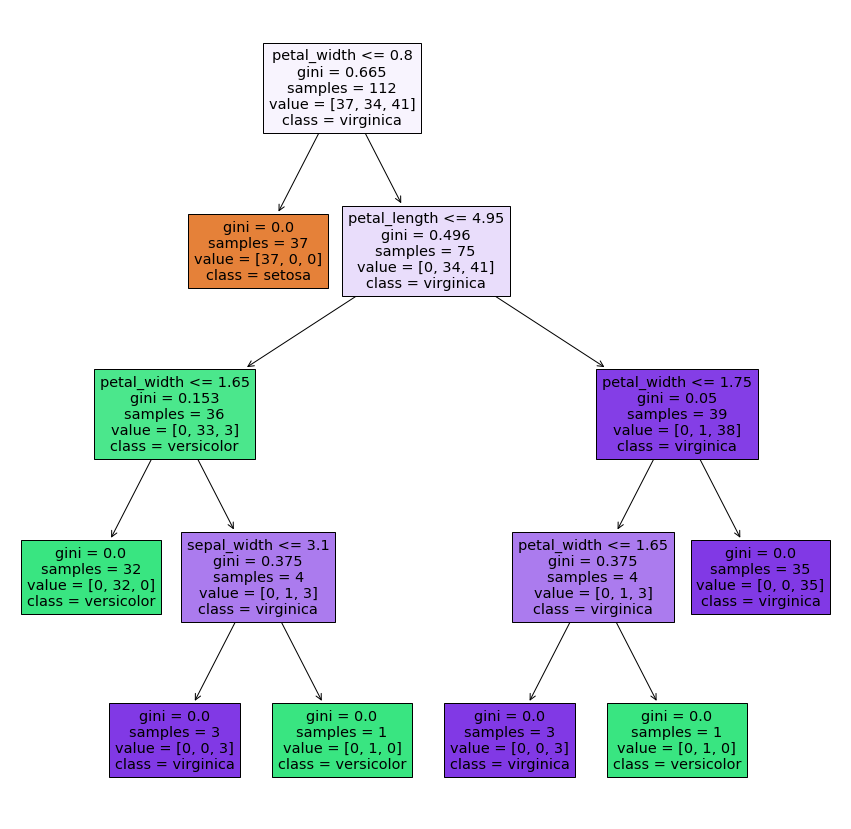

In [29]:
# Visualize the decision tree
plt.figure(figsize=(15,15))
plot_tree(tree_model,feature_names=X.columns,class_names=y.unique(),filled=True)
plt.show()

The above diagram of our tree shows us a wealth of information about the model.  For each node in the tree we can see the splitting criteria it uses at that node (feature and value) to create the children nodes.  We can also see a measure of the impurity of the data at that point in the tree (gini impurity) as well as the number of datapoints (samples) at the node from our training data.  Finally, we can see the count of points belonging to each of the 3 classes (value) and a predicted class (class) for the node - the shading of the node also represents the predicted class of the node based on the most common class among the points at the node.

In [30]:
# Calculate the accuracy on the test set
test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.974


Let's run one more and we will limit the min_samples_leaf to 5 samples per leaf of the tree to build a smaller tree and reduce the possibility of overfitting

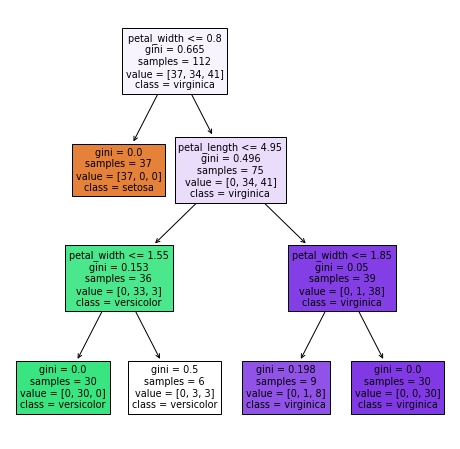

In [31]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=5,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(8,8))
plot_tree(tree_model,feature_names=X.columns,class_names=y.unique(),filled=True)
plt.show()

Now we can see that our model has produced a smaller tree, by limiting the depth to which the tree can grow.

In [32]:
# Calculate the accuracy on the test set
test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.895


## Random Forests

For tackling real-world problems we will generally use a Random Forest ensemble model rather than a single decision tree to reduce the probability of overfitting. Let's do an example of a Random Forest using the breast cancer dataset we have worked with earlier from the University of Wisconsin.

In [33]:
# Load the data
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.4)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.5372,0.23880,0.2768,0.07615
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.10890,0.15820,0.1050,0.08586,0.2346,0.08025


Let's start with a simple decision tree model to get a baseline.

In [34]:
# Instantiate the decision tree model
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train, y_train)

test_preds = tree_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.895


Now we'll try a random forest model, and use the default settings from scikit-learn for the hyperparameters of the model.

In [36]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                 max_features='auto',max_samples=None,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.934


Let's build another Random Forest model which will include all features in every tree that we grow, but reduce the number of training rows to 0.7 (70% of the total rows of the training set will be selected for use in any given tree in the forest).

In [37]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=1000,
                                 max_features=1.,max_samples=0.7,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.934


Finally, let's build one more model which simplifies the trees by setting min_samples_leaf=5 and reducing max_features to 0.1 (any given tree uses only 10% of the features in the data), but increase the number of trees to 1000

In [38]:
# Instantiate the random forest model
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=5,n_estimators=1000,
                                 max_features=0.1,max_samples=0.7,random_state=0)

# Fit the random forest to the data
rf_model.fit(X_train, y_train)

test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.943


In this case, a larger number of simpler trees beats a smaller number of more complex trees (this is not always the case, but often!)